In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer  #词向量化
from tensorflow.keras.preprocessing.sequence import pad_sequences  #序列矩阵
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_size=20000
max_length=32   #最大序列长度
padding_type="post"
truncating_type="post"
vocab_size=10000  #词典单词数量
embedding_dim=5

# 数据预处理

In [6]:
path=r"/home/bdai/718/tensroflow2022/4_LSTM/data/all.csv"
df=pd.read_csv(path)
#data=df["content"][0]
#corpus=data.lower().split("\n")
#corpus=[item.replace("\r","") for item in corpus]  #去除符号
#corpus=[item for item in corpus if item !=""]  #去除空值
#print(corpus)
da=df["content"][:]
da=da.tolist()  #转为列表
cor=[]
for item in da:
    cor.extend(item.split("\n"))
cor=[item.replace("\r","") for item in cor]  #去除符号
corpus=[item for item in cor if item!=""]  #去除空值
#print(corpus)

In [7]:
'''构建词典'''
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index=tokenizer.word_index
#print(word_index)
total_words=len(tokenizer.word_index)+1
print(total_words)

11912


In [8]:
input_seq=[]  #记录单词数
for line in corpus:
    token_list=tokenizer.texts_to_sequences([line])[0]  #序列化
    for i in range(1,len(token_list)):
        n_seq=token_list[:i+1]
        input_seq.append(n_seq)
        #print(n_seq)
#print(input_seq)

In [9]:
'''词典矩阵'''
max_seq_len=max([len(x) for x in input_seq])  #句子的最大长度
print(max_seq_len)
input_seq=np.array(pad_sequences(input_seq,
                                maxlen=max_seq_len, 
                                padding="pre"  #在前面加0
                                ))
'''划分数据'''
xs=input_seq[:,:-1]  #训练数据
labels=input_seq[:,-1]  #预测的词
ys=tf.keras.utils.to_categorical(labels,num_classes=total_words)  #转为one-hot编码
print(ys[0])
print(xs.shape)

86
[0. 1. 0. ... 0. 0. 0.]
(86291, 85)


# 构建神经网络模型

In [31]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words,  #词典中单词的数量
                            240,  #将每个数字转为固定维度为240的向量
                            input_length=max_seq_len-1  #我们把序列的最后一个值都去掉了
                            ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),  #双向循环
    tf.keras.layers.Dense(units=total_words,activation="softmax")
])

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

hist=model.fit(xs,ys,epochs=35)

2022-04-22 16:43:46.818130: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4111593568 exceeds 10% of free system memory.
2022-04-22 16:43:56.409470: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4111593568 exceeds 10% of free system memory.


Epoch 1/35
2697/2697 [==============================] - 56s 20ms/step - loss: 7.2682 - accuracy: 0.0544
Epoch 2/35
2697/2697 [==============================] - 53s 20ms/step - loss: 6.4659 - accuracy: 0.0829
Epoch 3/35
2697/2697 [==============================] - 53s 20ms/step - loss: 5.8294 - accuracy: 0.1138
Epoch 4/35
2697/2697 [==============================] - 53s 20ms/step - loss: 5.1751 - accuracy: 0.1581
Epoch 5/35
2697/2697 [==============================] - 53s 20ms/step - loss: 4.5387 - accuracy: 0.2196
Epoch 6/35
2697/2697 [==============================] - 53s 20ms/step - loss: 3.9609 - accuracy: 0.2942
Epoch 7/35
2697/2697 [==============================] - 52s 19ms/step - loss: 3.4538 - accuracy: 0.3724
Epoch 8/35
2697/2697 [==============================] - 52s 19ms/step - loss: 3.0223 - accuracy: 0.4421
Epoch 9/35
2697/2697 [==============================] - 52s 19ms/step - loss: 2.6602 - accuracy: 0.5036
Epoch 10/35
2697/2697 [==============================] - 52s 19m

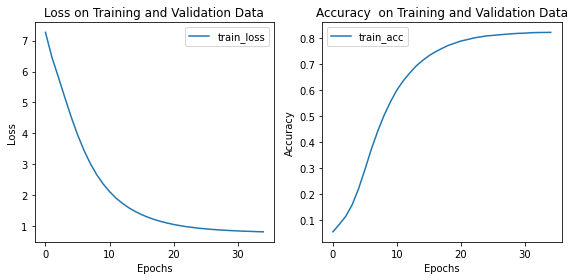

In [32]:
# define the function
def training_vis(hist):
    loss = hist.history['loss']
    #val_loss = hist.history['val_loss']
    acc = hist.history['accuracy']  # new version => hist.history['accuracy'] 
    #val_acc = hist.history['val_accuracy'] #=> hist.history['val_accuracy'] 
    
    # make a figure
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    #ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    # subplot acc
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    #ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy  on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()

training_vis(hist)

# 模型测试

In [33]:
data=df["content"][0]
corpus=data.lower().split("\n")
corpus=[item.replace("\r","") for item in corpus]  #去除符号
corpus=[item for item in corpus if item !=""]  #去除空值
#print(corpus)

In [36]:
seed_text="I trained an artificial intellectual disability"
next_word=26  #预测后面词的数量

for i in range(next_word):
    token_list=tokenizer.texts_to_sequences([seed_text])[0]  #序列化
    token_list=np.array(pad_sequences([token_list],
                                maxlen=max_seq_len-1, 
                                padding="pre"  #在前面加0
                                ))
    #p3rint(token_list)
    pre_result=model.predict(token_list)  #预测的结果是one-hot编码
    pre_result=np.argmax(pre_result,axis=1)  #改为数字

    for word,index in tokenizer.word_index.items():  #循环中找到数字对应的词
        if index==pre_result:
            output_word=word
            break 
    seed_text+=" "+output_word
    
print(seed_text)

I trained an artificial intellectual disability light and right all the grave and blind love are sought but still in him hear dead and blind and full again attend for high pressure


# 模型保存

In [1]:
#model_save_path = "lstm.h5"
# 保存模型
#model.save(model_save_path)
# 删除当前已存在的模型
#del model
# 加载模型
from keras.models import load_model
path=r"/home/bdai/718/tensroflow2022/4_LSTM/model/lstm.h5"
model=load_model(path)

2022-04-22 21:28:10.929644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 21:28:10.952779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 21:28:10.953282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 21:28:10.954943: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
seed_text="I trained an artificial intellectual disability"
next_word=100  #预测后面词的数量

for i in range(next_word):
    token_list=tokenizer.texts_to_sequences([seed_text])[0]  #序列化
    token_list=np.array(pad_sequences([token_list],
                                maxlen=max_seq_len-1, 
                                padding="pre"  #在前面加0
                                ))
    #p3rint(token_list)
    pre_result=model.predict(token_list)  #预测的结果是one-hot编码
    pre_result=np.argmax(pre_result,axis=1)  #改为数字

    for word,index in tokenizer.word_index.items():  #循环中找到数字对应的词
        if index==pre_result:
            output_word=word
            break 
    seed_text+=" "+output_word
    
print(seed_text)

I trained an artificial intellectual disability light and right all the grave and blind love are sought but still in him hear dead and blind and full again attend for high pressure of the dust into the storm she halfe and her wake us rest did rest him first all dead in copyright thread as the woman only meet the eagle and the dove to the last hands into the iron men are long along the anecdote and long along and freeze by men for pray and fashion and increase the broad leafless and my increase the poem the false doth take run up and the
